start
classname: ['Albrecht_Dürer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 'Andy_Warhol', 'Camille_Pissarro', 'Caravaggio', 'Claude_Monet', 'Diego_Rivera', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Eugene_Delacroix', 'Francisco_Goya', 'Frida_Kahlo', 'Georges_Seurat', 'Giotto_di_Bondone', 'Gustav_Klimt', 'Gustave_Courbet', 'Henri_Matisse', 'Henri_Rousseau', 'Henri_de_Toulouse-Lautrec', 'Hieronymus_Bosch', 'Jackson_Pollock', 'Jan_van_Eyck', 'Joan_Miro', 'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne', 'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Piet_Mondrian', 'Pieter_Bruegel', 'Raphael', 'Rembrandt', 'Rene_Magritte', 'Salvador_Dali', 'Sandro_Botticelli', 'Titian', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'William_Turner']
classname2: ['Albrecht_Dürer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 'Andy_Warhol', 'Camil

  0%|          | 1/1690 [00:00<03:50,  7.34it/s]

model OK
Epoch 0/4
----------


  0%|          | 0/423 [00:00<?, ?it/s]

train Loss: 2.8625 Acc: 0.2696


  0%|          | 1/1690 [00:00<02:54,  9.70it/s]

val Loss: 2.1714 Acc: 0.4535

Epoch 1/4
----------


  0%|          | 1/423 [00:00<01:09,  6.07it/s]

train Loss: 2.3709 Acc: 0.3740


  0%|          | 1/1690 [00:00<04:05,  6.89it/s]

val Loss: 1.8376 Acc: 0.5258

Epoch 2/4
----------


  0%|          | 0/423 [00:00<?, ?it/s]

train Loss: 2.1791 Acc: 0.4190


  0%|          | 1/1690 [00:00<03:21,  8.40it/s]

val Loss: 1.9962 Acc: 0.5228

Epoch 3/4
----------


  0%|          | 1/423 [00:00<00:46,  9.15it/s]

train Loss: 2.0673 Acc: 0.4515


  0%|          | 0/1690 [00:00<?, ?it/s]

val Loss: 1.8939 Acc: 0.5240

Epoch 4/4
----------


  0%|          | 1/423 [00:00<00:55,  7.61it/s]

train Loss: 1.9632 Acc: 0.4700


100%|██████████| 423/423 [00:53<00:00,  7.92it/s]

val Loss: 1.9984 Acc: 0.5518

Training complete in 22m 41s
Best val Acc: 0.551806


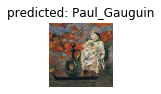

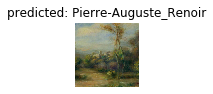

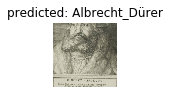

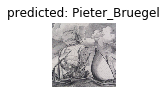

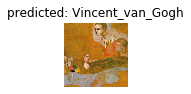

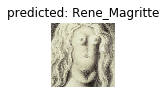

acc_list: [tensor(0.2696, device='cuda:0', dtype=torch.float64), tensor(0.4535, device='cuda:0', dtype=torch.float64), tensor(0.3740, device='cuda:0', dtype=torch.float64), tensor(0.5258, device='cuda:0', dtype=torch.float64), tensor(0.4190, device='cuda:0', dtype=torch.float64), tensor(0.5228, device='cuda:0', dtype=torch.float64), tensor(0.4515, device='cuda:0', dtype=torch.float64), tensor(0.5240, device='cuda:0', dtype=torch.float64), tensor(0.4700, device='cuda:0', dtype=torch.float64), tensor(0.5518, device='cuda:0', dtype=torch.float64)]


In [29]:
import torch
from torchvision import transforms, datasets, models
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import time
import copy
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from tqdm import tqdm


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
#     inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

acc_list = []
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
#         for phase in ['val', 'train']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
#                     print('outputs:', outputs)
#                     print('labels:', labels)
                    _, preds = torch.max(outputs, 1)
#                     print('preds:', preds)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
#                 print("running_loss:{}, running_corrects:{}".format(running_loss, running_corrects))
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


print("start")
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                              std=[0.229, 0.224, 0.225])
    ])
test_data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])

artists_dataset = datasets.ImageFolder(root='/home/lab/yasuhiro/Downloads/best-artworks-of-all-time/images/images',
                                           transform=data_transform)
dataset_loader = torch.utils.data.DataLoader(artists_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=0)

test_dataset = datasets.ImageFolder(root='/home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test',
                                           transform=test_data_transform)

test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=0)

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {'train':artists_dataset ,'val':test_dataset}
dataloaders = {'train':dataset_loader ,'val':test_dataset_loader}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
class_names2 = image_datasets['val'].classes
print('classname:', class_names)
print('classname2:', class_names2)
print("Dataloader OK")
# device = torch.device("cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device OK")


# Get a batch of training data
print("start iter")
# inputs, classes = next(iter(dataset_loader))
print("make grid")
# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[artists_dataset.classes[x] for x in classes])




print("start fit model")
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 50)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

print("model OK")

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

visualize_model(model_ft)
print("acc_list:", acc_list)


weight_s: [[ 0.0571133   0.01859996 -0.08442204 ...  0.07982798 -0.03336316
   0.00673669]
 [-0.00052553 -0.01558691 -0.07327911 ... -0.04557365  0.08723675
  -0.12356826]
 [ 0.04160666  0.05500263  0.09504864 ...  0.01081299  0.06594639
   0.0247243 ]
 ...
 [-0.03702054  0.07000514 -0.00738067 ... -0.05851077 -0.02406423
  -0.03395222]
 [ 0.01317508  0.06431802  0.01536992 ... -0.07697625  0.03233236
  -0.01641036]
 [-0.01508898 -0.05398611 -0.05137594 ...  0.04160796  0.00417113
   0.05104349]]
idx [16 14  9 42 15 37 11 30 27  8 34 20 12 47 13 48 41 38 24 29  6 26 18  4
 23 17 49 39 40 22 36 33 19 43 25 21  7 46 45 31 44 32  3  0  5 28  1  2
 10 35]
1.000 -> Frida_Kahlo
0.000 -> Eugene_Delacroix
0.000 -> Diego_Velazquez
0.000 -> Rembrandt
0.000 -> Francisco_Goya
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Albrecht_Dürer/Albrecht_Dürer_324.jpg for the top1 prediction: Frida_Kahlo


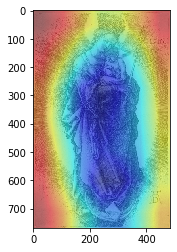

idx [ 9 16 14 27 37 42 36 18 11 15 48 24 34  8 41 47  6 26 30 20 29 19 23 12
 39  4 21  7 22 33 32 31 49 44 13 40  0 17 38 25  3 46 45 43 28  5  2  1
 10 35]
0.997 -> Diego_Velazquez
0.003 -> Frida_Kahlo
0.000 -> Eugene_Delacroix
0.000 -> Joan_Miro
0.000 -> Peter_Paul_Rubens
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Alfred_Sisley/Alfred_Sisley_91.jpg for the top1 prediction: Diego_Velazquez


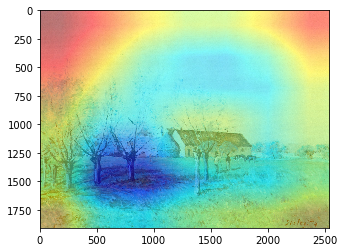

idx [16  8 27 42 34  4  9 41 40 43 30 48 13 20 14 37 12 29 38 39 24 21 26 15
 47 22 33 11 17 23 25 36 45  6 18  2 19 46  3 49 31 35 10  0  1 28  5  7
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Paul_Cezanne
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Amedeo_Modigliani/Amedeo_Modigliani_29.jpg for the top1 prediction: Frida_Kahlo


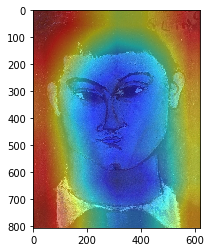

idx [16  8 27 42  9 14 30 37 34 15 11 13 24 48 41 12 20 47  4 40 29 38 26 23
 18 22 21 33 39  6 17 25 43 36 19 49 45 32  5 35 10  0 31  7  1  3 28  2
 44 46]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Diego_Velazquez
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Andrei_Rublev/Andrei_Rublev_27.jpg for the top1 prediction: Frida_Kahlo


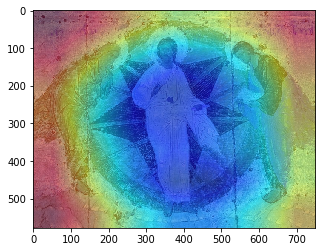

idx [ 9 14 37 11 36 15 18  6 24 34 47 16 27 42 26 48 30 20 41 32 12  8 19 44
 39  7 29 49 31 23 22  4 13  0 33 21 46 17 38 40  3 10 35  5  2  1 25 28
 43 45]
1.000 -> Diego_Velazquez
0.000 -> Eugene_Delacroix
0.000 -> Peter_Paul_Rubens
0.000 -> Edouard_Manet
0.000 -> Paul_Klee
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Andy_Warhol/Andy_Warhol_177.jpg for the top1 prediction: Diego_Velazquez


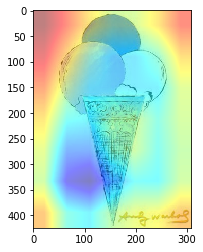

idx [16  8 27 42  4 34 43 48 30 38 40 41 14  9 13 20 24 29 12 26 15 37 39 33
 22 11 21 23 25 17 47 19 36  6 45 18 49 46  7  3  2 31 10  5  0 28 35  1
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Camille_Pissarro/Camille_Pissarro_15.jpg for the top1 prediction: Frida_Kahlo


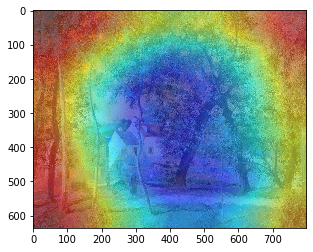

idx [16  8 42 27  4 13 34 40  9 43 30 37 41 20 14 29 15 12 38 35 39 36 32 33
 49 48 44 45 22 24 47 46 11  7  5  6  1  0  2  3 10 19 17 18 23 21 25 28
 26 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Joan_Miro
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Caravaggio/Caravaggio_49.jpg for the top1 prediction: Frida_Kahlo


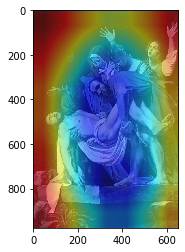

idx [16  9 27 14 42 18 36 37 47 15 34 11 30 24 48  8  6 26 41 20 12 29 19  4
 13 39 23 31 22  7 33 44 21 49 38 17 32 40  0 25 46  3 45 43 28  5  1  2
 10 35]
0.572 -> Frida_Kahlo
0.427 -> Diego_Velazquez
0.000 -> Joan_Miro
0.000 -> Eugene_Delacroix
0.000 -> Rembrandt
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Claude_Monet/Claude_Monet_26.jpg for the top1 prediction: Frida_Kahlo


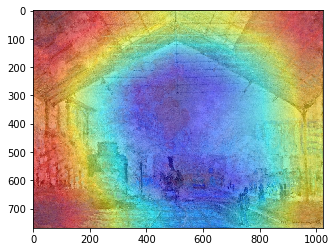

idx [16  8 27 42 37  9 24 14 34  4 29 41 15 48 30 20 21 36 40 47 12 39 13 23
 11 26  6 33 22 19 43 18 25 38 31 17  3 49 45  0 46  7  2 35 10  5  1 28
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Peter_Paul_Rubens
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Diego_Rivera/Diego_Rivera_5.jpg for the top1 prediction: Frida_Kahlo


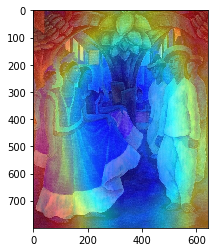

idx [16  8 43  4 27 40 34 42 39 13 41 48  9 12 20 30 26  2 21 33 38 29 22 37
 17 14 23 15 24 11 45 25 47 18  3 46 36  6 10 49  0 35  5  7  1 19 28 31
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Rene_Magritte
0.000 -> Andy_Warhol
0.000 -> Joan_Miro
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Diego_Velazquez/Diego_Velazquez_101.jpg for the top1 prediction: Frida_Kahlo


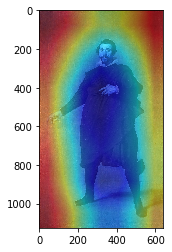

idx [16  8 42 27  4 43 34 30 13  9 40 12 41 48 38 39 20 26 14 17 11 22 37 29
 21 33 15 25 23 47 49 35 36 46 32  6  1  0  2  3 10  7  5 18 19 24 44 45
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Joan_Miro
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Edgar_Degas/Edgar_Degas_85.jpg for the top1 prediction: Frida_Kahlo


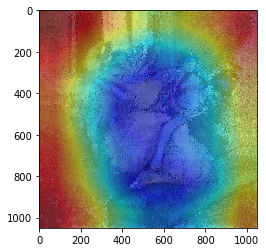

idx [16  8 27 43  4 42 34 40 13  9 48 12 30 41 26 39 20 29 21 33 38 37 32 36
 22 19 44 35 47 46 49 45 14  7  5  6  1  0  2  3 11 15 10 18 23 24 17 25
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rene_Magritte
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Edouard_Manet/Edouard_Manet_58.jpg for the top1 prediction: Frida_Kahlo


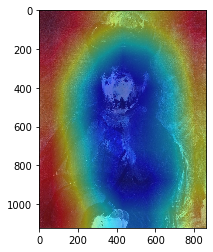

idx [16  9 27  8 42 14 34 30 11 37 15 12 47 41 48 20 13 24 18 26 29  4 38 39
 21 40 23 22  6 36 17 33 49 43 25 19 31  7 45 32  0 35 10  5  1  3  2 28
 44 46]
1.000 -> Frida_Kahlo
0.000 -> Diego_Velazquez
0.000 -> Joan_Miro
0.000 -> Diego_Rivera
0.000 -> Rembrandt
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Edvard_Munch/Edvard_Munch_9.jpg for the top1 prediction: Frida_Kahlo


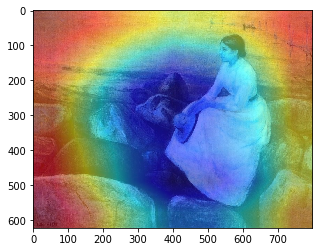

idx [16  8 27  4 42 43 34 40 37 35 32 33 25 24 28 31 13  7  5  6  1  0  2  3
 21 19 17 18 22 20 26 30 38 36 49 48 41 46 44 47 14 11  9 10 15 12 39 45
 23 29]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Andy_Warhol
0.000 -> Rembrandt
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/El_Greco/El_Greco_3.jpg for the top1 prediction: Frida_Kahlo


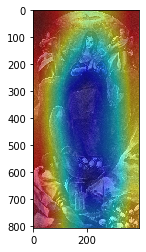

idx [16  8 27 42 34 30  4 13 40 43  9 12 20 48 14 41 26 39 37 38 29 24 11 15
 21 36 32 35 47 46 49 33 10  7  5  6  1  0  2  3 22 19 17 18 23 25 44 45
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Paul_Cezanne
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Eugene_Delacroix/Eugene_Delacroix_28.jpg for the top1 prediction: Frida_Kahlo


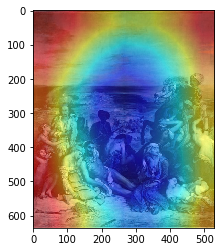

idx [16  8 27 42 34 40  4 43  9 13 41 30 48 12 20 29 21 38 14 37 39 22 24 26
 15 33 47 17 49 46 32 35 36 11  5  6  1  0  2  3 10  7 19 18 23 25 44 45
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Paul_Cezanne
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Francisco_Goya/Francisco_Goya_32.jpg for the top1 prediction: Frida_Kahlo


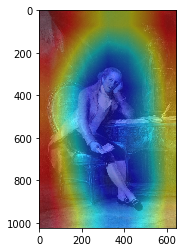

idx [ 9 16 14 37 42 27 15 11 18 34  8 24 41 36 48 47 30  6 20 26 12 29 39 23
  4 13 19 22 21 33 31 49 32 40  7 44 38 17  0 46 25 45  3 43 28 10  2  1
 35  5]
0.980 -> Diego_Velazquez
0.020 -> Frida_Kahlo
0.000 -> Eugene_Delacroix
0.000 -> Peter_Paul_Rubens
0.000 -> Rembrandt
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Frida_Kahlo/Frida_Kahlo_64.jpg for the top1 prediction: Diego_Velazquez


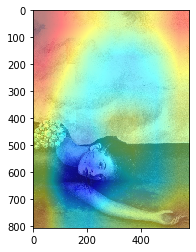

idx [16 27  8 42  9 14 34 48 41 37 30 20 24 15  4 47 40 22 29 38 26 11 39 17
 12 13 36 18 43  6 21 23 33 19 49 25 46 45  7 31  3  5  2  0 28 44 32 10
  1 35]
1.000 -> Frida_Kahlo
0.000 -> Joan_Miro
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Diego_Velazquez
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Georges_Seurat/Georges_Seurat_29.jpg for the top1 prediction: Frida_Kahlo


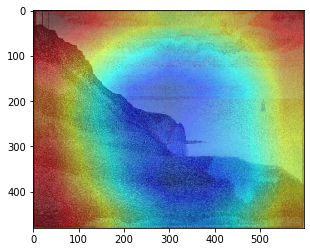

idx [16  8 27 42 34  4 40  9 30 43 13 20 41 48 14 37 12 29 39 38 24 26 15 21
 22 33 47 23 11 17 25 36 45 18  6  2  3 32 49 35 10  0  5  7  1 19 28 31
 44 46]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Paul_Cezanne
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Giotto_di_Bondone/Giotto_di_Bondone_20.jpg for the top1 prediction: Frida_Kahlo


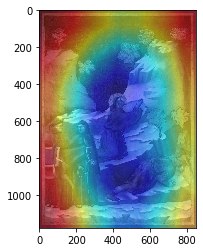

idx [16 27  8 42  4 48 19 36  9 34 30 41 21 38 29 24 14 15 47 22 37 26 12 23
 20 17  6 13 40 39 33 43 11  7 25 18  3 49 31 46 45 28  5  0  2 44 32  1
 10 35]
0.788 -> Frida_Kahlo
0.211 -> Joan_Miro
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Gustav_Klimt/Gustav_Klimt_50.jpg for the top1 prediction: Frida_Kahlo


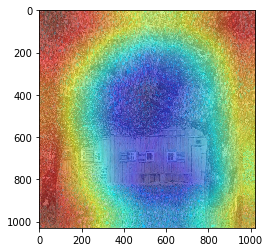

idx [16  8 27 43  4 34 42 40 13 41 48 39 26 30  9 12 20 21 29 38 33 17 22  2
 37 24 23 14 15 25 45 49 36 47 32 35  1  0  3  6 11 10  5  7 19 18 44 46
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rene_Magritte
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Gustave_Courbet/Gustave_Courbet_26.jpg for the top1 prediction: Frida_Kahlo


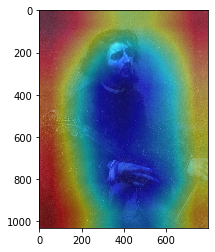

idx [16  8 27 42  4 43 34 40 41 13 20 48  9 29 39 30 21 26 12 38 37 33 24 22
 14 15 23 17  2 25 45 47 18 36 49 35  1  0  3 32 11 10  5  7 28 19 44  6
 31 46]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Henri_Matisse/Henri_Matisse_128.jpg for the top1 prediction: Frida_Kahlo


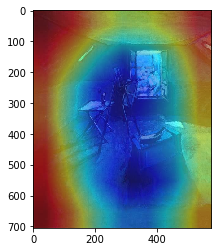

idx [16  9 42 27 14  8 34 37 30 48 11 15 41 20  4 47 12 26 39 24 29 18  6 13
 36 22 23 21 33 38 40 17 19 43 49  7 25 31 46 45 44  3 32  0 28  2  5 10
 35  1]
1.000 -> Frida_Kahlo
0.000 -> Diego_Velazquez
0.000 -> Rembrandt
0.000 -> Joan_Miro
0.000 -> Eugene_Delacroix
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Henri_Rousseau/Henri_Rousseau_21.jpg for the top1 prediction: Frida_Kahlo


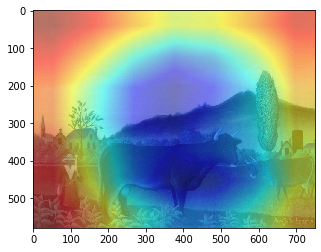

idx [16  8 27 42  4 34  9 40 14 30 48 41 24 37 29 13 20 43 15 38 21 11 12 26
 39 33 23 47 25 36 22 18 17  6 19 45 49  3 31 46  2 35 10  0  1 28  5  7
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Henri_de_Toulouse-Lautrec/Henri_de_Toulouse-Lautrec_77.jpg for the top1 prediction: Frida_Kahlo


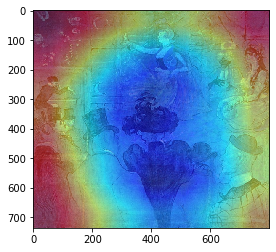

idx [16  8 27 42 41 40 34  4 29 37  9 24 48 14 13 43 15 20 21 30 22 38 39 33
 12 26 23 47 17 18 25 11 36 45  6 19  3 32 49 35 10  0  2  5  1  7 28 31
 44 46]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Raphael
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Hieronymus_Bosch/Hieronymus_Bosch_62.jpg for the top1 prediction: Frida_Kahlo


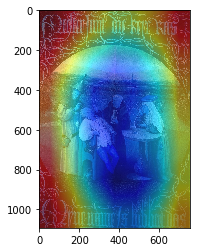

idx [16  8 27 42  4 40 34 30 13 43  9 37 41 35 32 33 14  7  5  6  1 46 44 28
 21 19 17 18 25 24 26 31 38 36 49 48 47  0  2  3 15 12 11 10 22 20 39 45
 23 29]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Jackson_Pollock/Jackson_Pollock_6.jpg for the top1 prediction: Frida_Kahlo


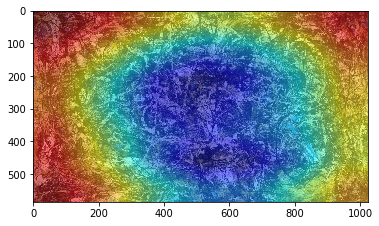

idx [16  8 27 42 34  4 41 43 40  9 20 29 13 30 39 21 48 24 37 26 14 12 22 15
 38 17 33 47 23 18 45 11 36 25  2  6 19  3 46 31 49 35 10  0  1 28  5  7
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Paul_Cezanne
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Jan_van_Eyck/Jan_van_Eyck_67.jpg for the top1 prediction: Frida_Kahlo


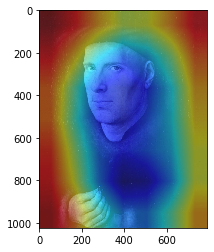

idx [ 9 16 14 27 11 47 34 42 36 18 37 30 15 24  8 48 41 12  6 26 20 39 29 21
 49 22  7 23 31 19 13 44 38  4 17 33 32 40 46 25  0 28 45  3 43  5  1  2
 10 35]
0.971 -> Diego_Velazquez
0.029 -> Frida_Kahlo
0.000 -> Eugene_Delacroix
0.000 -> Joan_Miro
0.000 -> Edouard_Manet
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Joan_Miro/Joan_Miro_101.jpg for the top1 prediction: Diego_Velazquez


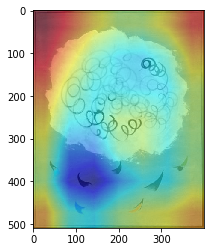

idx [ 9 16 14 37 27 47  8 30 36 42 11 24 34 15 18 48 41 12  6 20 26 29 39 19
 22 23 21  4 49 31 13 38  7 32 44 17 40 33 46  0 25  3 43 45 28  5  2 10
 35  1]
0.994 -> Diego_Velazquez
0.006 -> Frida_Kahlo
0.000 -> Eugene_Delacroix
0.000 -> Peter_Paul_Rubens
0.000 -> Joan_Miro
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Kazimir_Malevich/Kazimir_Malevich_60.jpg for the top1 prediction: Diego_Velazquez


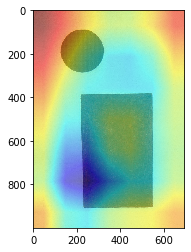

idx [16  8 27 42 43  4 34 40 41 13 20  9 30 39 48 38 29 12 21 26 22 14 37 24
 17 33 15 47 23 25 11 45  2  6 46 18 19 36 49 35 10  0  3  5  1  7 28 31
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Rene_Magritte
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Leonardo_da_Vinci/Leonardo_da_Vinci_121.jpg for the top1 prediction: Frida_Kahlo


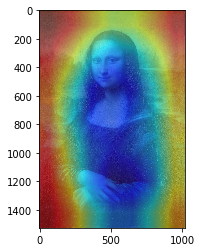

idx [16  9 27 14 37 15  8 47 34 42 24 30 11 36  6 12 41 20 48 18 26  4 29 13
 21 22 23 39 19 33 38 31 40  7 49 25 17 44 32 35  0 43 10  5  1  3  2 28
 45 46]
1.000 -> Frida_Kahlo
0.000 -> Diego_Velazquez
0.000 -> Joan_Miro
0.000 -> Eugene_Delacroix
0.000 -> Peter_Paul_Rubens
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Marc_Chagall/Marc_Chagall_155.jpg for the top1 prediction: Frida_Kahlo


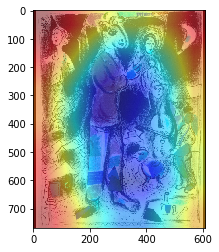

idx [16  9 14 42 27 34 11 37 15  8 24 30 47 41 18 48 12 20 36 26  6 13 29 39
  4 49 38 23 21 17 22  7 19 33 40 31 25 44 32 46 43 45  0  3 28  5  2  1
 10 35]
1.000 -> Frida_Kahlo
0.000 -> Diego_Velazquez
0.000 -> Eugene_Delacroix
0.000 -> Rembrandt
0.000 -> Joan_Miro
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Michelangelo/Michelangelo_6.jpg for the top1 prediction: Frida_Kahlo


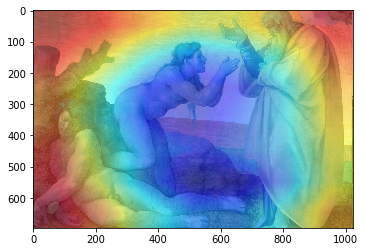

idx [16  8 27 42 43  4 34 40 48 13 30  9 41 38 12 26 39 29 20 21 17 33 22 23
 14 37 24 25  2 45 49 35 36 47 32 15  1  0  3  6 11 10  5  7 19 18 44 46
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Rene_Magritte
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Mikhail_Vrubel/Mikhail_Vrubel_38.jpg for the top1 prediction: Frida_Kahlo


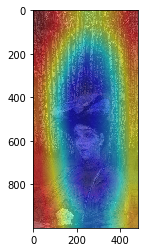

idx [16 27  8 42  4 34 29 37 41  9 24 14 30 15 20 13 48 21 40 43 36 38 12 26
 47 33 23 39 19 11  6 22 25 17 18 31 45  3 49 46  2  7  0  5 10 28 44  1
 32 35]
1.000 -> Frida_Kahlo
0.000 -> Joan_Miro
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Pablo_Picasso/Pablo_Picasso_289.jpg for the top1 prediction: Frida_Kahlo


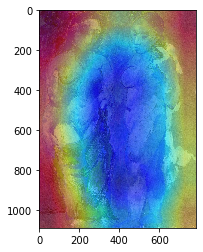

idx [16  8 27 42  4 34 40 13 37 35 32 47 43 25 28 31 14  7  5  6  1  0  2  3
 21 19 17 18 22 24 26 30 38 36 49 33 48 41 44 46 15 11  9 10 12 20 39 45
 23 29]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Paul_Cezanne/Paul_Cezanne_46.jpg for the top1 prediction: Frida_Kahlo


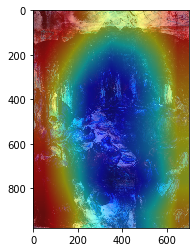

idx [ 9 16 14 11 30 37 27 42 48 47 15 34 12 36 24 18  8 20 26 49  6 41 39 38
 29 17  7 23 19 40 22  4 13 44 33 32 46 21 43 31 25  0  3 28  5 45  1  2
 10 35]
0.546 -> Diego_Velazquez
0.395 -> Frida_Kahlo
0.060 -> Eugene_Delacroix
0.000 -> Edouard_Manet
0.000 -> Marc_Chagall
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Paul_Gauguin/Paul_Gauguin_169.jpg for the top1 prediction: Diego_Velazquez


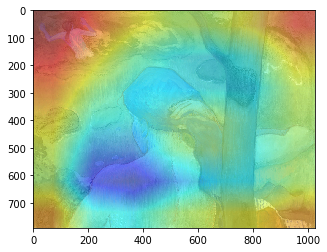

idx [ 9 16 14 27 11 37 47 42 30 34 15  8 36 18 48 12 41 24 20  6 26 23 39 29
 21  7  4 22 49 19 44 13 38 31 32 40 17 33 25 46  0 45  3 43 28 10  2  1
 35  5]
0.893 -> Diego_Velazquez
0.107 -> Frida_Kahlo
0.000 -> Eugene_Delacroix
0.000 -> Joan_Miro
0.000 -> Edouard_Manet
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Paul_Klee/Paul_Klee_154.jpg for the top1 prediction: Diego_Velazquez


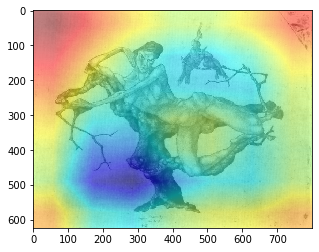

idx [16  8 27 42  4 13 43 40 35 34 32 47 41 25 28 31 14  7  5  6  1  0  2  3
 21 19 17 18 22 24 26 30 37 36 49 33 48 46 44 45 15 11  9 10 12 20 38 39
 23 29]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Peter_Paul_Rubens/Peter_Paul_Rubens_118.jpg for the top1 prediction: Frida_Kahlo


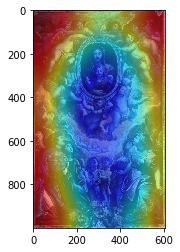

idx [16 27  8 42 34 38 30  4 48  9 14 43 41 13 20 12 40 39 47 11 26 17 22 37
 15 24 21 29 33 25 23 19 36  6 49 18 46 45  7  5 31  2 10  3 35  0  1 28
 32 44]
1.000 -> Frida_Kahlo
0.000 -> Joan_Miro
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Paul_Cezanne
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_134.jpg for the top1 prediction: Frida_Kahlo


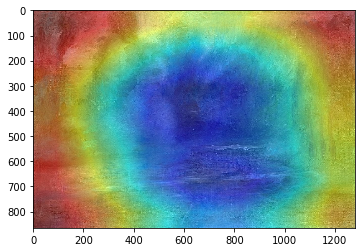

idx [ 9 16 27 14 36 42 15  8 24 48 37 34 11  6 41  4 18 19 26 47 30 29 12 20
 23 39 21  7 33 22 13 49 32 31  0 17 44 40 25  3 46 38 43 28 45  2  5 10
  1 35]
0.716 -> Diego_Velazquez
0.219 -> Frida_Kahlo
0.037 -> Joan_Miro
0.016 -> Eugene_Delacroix
0.007 -> Paul_Klee
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Piet_Mondrian/Piet_Mondrian_61.jpg for the top1 prediction: Diego_Velazquez


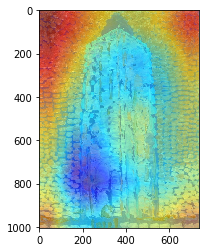

idx [16  8 27 42 34  9 30 40 41 13  4 48 20 14 24 29 37 43 26 38 47 12 39 21
 18 15 22 17 33 11 23 36 32 46 49 35  1  0  2  3 10  7  5  6 19 25 44 45
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Paul_Cezanne
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Pieter_Bruegel/Pieter_Bruegel_10.jpg for the top1 prediction: Frida_Kahlo


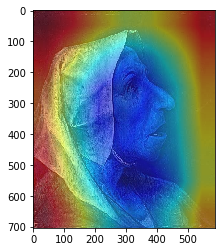

idx [16  8 27 42  4 43 34 40 13  9 41 48 30 20 39 12 29 26 38 37 22 14 33 21
 47 36 32 35 49 46 44 45 15  7  5  6  1  0  2  3 11 10 17 18 25 24 23 19
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Andy_Warhol
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Raphael/Raphael_97.jpg for the top1 prediction: Frida_Kahlo


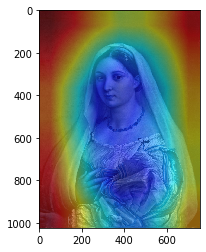

idx [16  8 27 42  9 34  4 30 41 37 14 20 48 13 12 47 26 39 40 29 43 22 15 38
 21 24 11 17 23 18 33 36  6 32 49 46 19  1  2 35 10  0  5  7 28 25 44  3
 31 45]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Joan_Miro
0.000 -> Rembrandt
0.000 -> Diego_Velazquez
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Rembrandt/Rembrandt_126.jpg for the top1 prediction: Frida_Kahlo


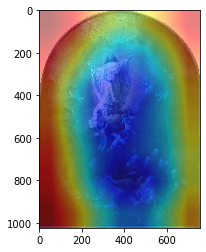

idx [16  8  4 43 42 34 13 27 26 39 12 40 48 30 41  9 38 37 32 35 36 46 49 33
 25 21 17 19 44 24 28 47 14  7  5  6  1  0  2  3 11 15 10 18 22 20 45 31
 23 29]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Andy_Warhol
0.000 -> Rene_Magritte
0.000 -> Rembrandt
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Rene_Magritte/Rene_Magritte_180.jpg for the top1 prediction: Frida_Kahlo


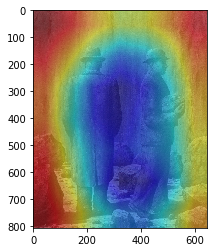

idx [16 14  9 42  8 27 34 30 37 11 15 48 41 20 24 47 12 39  4 38 13 40 26 17
  6 49 36 22 18 29 23 21 43 33 19 25 46  7 45 31  5 28 44  3 32  0  2  1
 10 35]
1.000 -> Frida_Kahlo
0.000 -> Eugene_Delacroix
0.000 -> Diego_Velazquez
0.000 -> Rembrandt
0.000 -> Diego_Rivera
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Salvador_Dali/Salvador_Dali_98.jpg for the top1 prediction: Frida_Kahlo


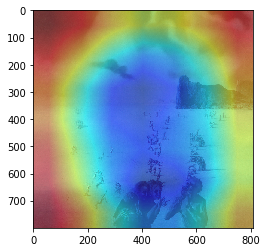

idx [16  8 42 40 27  4 13 34  9 43 41 29 37 30 20 14 48 15 12 24 26 33 39 21
 11 38 23 45 49 47 32 35 36  7  5  6  1  0  2  3 10 19 17 18 22 25 44 46
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Pieter_Bruegel
0.000 -> Joan_Miro
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Sandro_Botticelli/Sandro_Botticelli_59.jpg for the top1 prediction: Frida_Kahlo


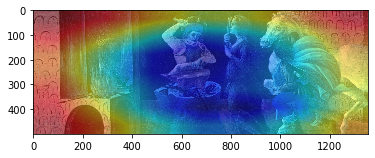

idx [16  8 42 27 43 34  4 13 40  9 30 41 48 20 12 38 14 29 37 15 26 39 33 21
 24 22 17 23 11 49 35 46 47 36 32  6  1  0  2  3 10  7  5 18 19 25 44 45
 28 31]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Rembrandt
0.000 -> Joan_Miro
0.000 -> Rene_Magritte
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Titian/Titian_138.jpg for the top1 prediction: Frida_Kahlo


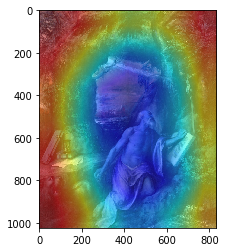

idx [16 27  9 42  8 14 34 37 47 15 30 41 36 24 48  4 20 29 11 12 21  6 26 39
 13 18 23 19 22 33 38 40 31 17 25 49  7 43 44 46  3  0 45 32 28  2  5 10
 35  1]
1.000 -> Frida_Kahlo
0.000 -> Joan_Miro
0.000 -> Diego_Velazquez
0.000 -> Rembrandt
0.000 -> Diego_Rivera
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_15.jpg for the top1 prediction: Frida_Kahlo


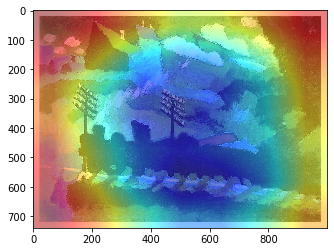

idx [16  8  4 42 40 27 43 34 13 41  9 48 30 20 26 12 39 37 32 35 38 36 47 33
 49 24 17 19 22 45 25 46 14  7  5  6  1  0  2  3 11 15 10 18 23 21 44 31
 28 29]
1.000 -> Frida_Kahlo
0.000 -> Diego_Rivera
0.000 -> Andy_Warhol
0.000 -> Rembrandt
0.000 -> Pieter_Bruegel
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/Vincent_van_Gogh/Vincent_van_Gogh_340.jpg for the top1 prediction: Frida_Kahlo


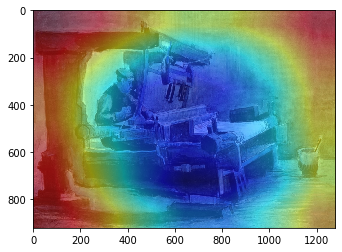

idx [16  9 27 14 30 34 42 11 47  8 12 48 37 20 15 39 26 36 41 38 18  4  6 13
 24 23 29 17 19 22 21  7 49 40 33 43 25 44 46 31 32 28 45  5  0  3  2 10
  1 35]
1.000 -> Frida_Kahlo
0.000 -> Diego_Velazquez
0.000 -> Joan_Miro
0.000 -> Eugene_Delacroix
0.000 -> Marc_Chagall
output /home/lab/yasuhiro/Downloads/best-artworks-of-all-time/test/William_Turner/William_Turner_50.jpg for the top1 prediction: Frida_Kahlo


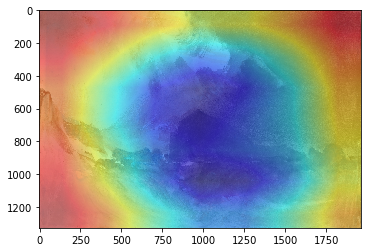

In [30]:
import os
# networks such as googlenet, resnet, densenet already use global average pooling at the end, so CAM could be used directly.

net = model_ft
finalconv_name = 'layer4'

net.eval()

# hook the feature extractor
features_blobs = []
def hook_feature(module, input, output):
    features_blobs.append(output.data.cpu().numpy())

net._modules.get(finalconv_name).register_forward_hook(hook_feature)

# get the softmax weight
params = list(net.parameters())
weight_softmax = np.squeeze(params[-2].data.cpu().numpy())
# print('params:', params)
print('weight_s:', weight_softmax)

def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam


normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize((224,224)),
   transforms.ToTensor(),
   normalize
])

def show_img(path):
    img_pil = Image.open(path)

    img_tensor = preprocess(img_pil)
    img_variable = Variable(img_tensor.unsqueeze(0))
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    img_variable = img_variable.to(device)
    logit = net(img_variable)

    # download the imagenet category list
    classes = class_names

    h_x = F.softmax(logit, dim=1).data.squeeze()
    probs, idx = h_x.sort(0, True)
    probs = probs.cpu().numpy()
    idx = idx.cpu().numpy()

    print('idx', idx)
    # output the prediction
    for i in range(0, 5):
        print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

    # generate class activation mapping for the top1 prediction
    CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0]])

    # render the CAM and output
    print('output {} for the top1 prediction: {}'.format(path ,classes[idx[0]]))
    img = cv2.imread(path)
    height, width, _ = img.shape
    heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
    result = heatmap * 0.3 + img * 0.5

    plt.figure()
    plt.imshow(img, alpha=0.9)
    plt.imshow(heatmap, alpha=0.5)
    plt.show()
    
dir = "/home/lab/yasuhiro/Downloads/best-artworks-of-all-time/"
list_labels = os.listdir(os.path.join(dir, "test"))
for i in list_labels:
    list_image = os.listdir(os.path.join(dir, "test", i))
    for j in list_image:
        show_img(os.path.join(dir, "test", i, j))
        break

tensor([[ 49.,   0.,   0.,  ...,   0.,   0.,   4.],
        [  0.,  27.,   0.,  ...,   0.,   7.,   0.],
        [  0.,   0.,  32.,  ...,   0.,   4.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,   2.,  12.,   0.],
        [  4.,   4.,   1.,  ...,   0., 116.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   8.]])


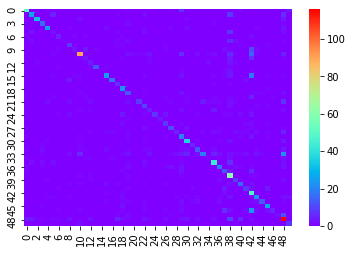

tensor([0.7424, 0.5192, 0.8205, 0.8000, 0.6944, 0.1111, 0.4545, 0.0667, 0.6429,
        0.1154, 0.6429, 0.1667, 0.3077, 0.7647, 0.0000, 0.4310, 0.7083, 0.7778,
        0.9583, 0.5652, 0.0000, 0.2432, 0.7143, 0.3125, 0.2963, 0.8000, 0.5625,
        0.6000, 0.2000, 0.6897, 0.7500, 0.6000, 0.4118, 0.2159, 0.1111, 0.6935,
        0.5000, 0.4643, 0.9104, 0.5294, 0.5926, 0.3636, 0.9231, 0.5641, 0.4643,
        0.8182, 0.0980, 0.1111, 0.6629, 0.6154])


In [40]:
import seaborn

model = model_ft
nb_classes = 50

confusion_matrix = torch.zeros(nb_classes, nb_classes)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)
seaborn.heatmap(np.array(confusion_matrix), cmap='rainbow')
plt.show()
# To get the per-class accuracy:
print(confusion_matrix.diag()/confusion_matrix.sum(1))

